# Swiggy Dataset Analysis

## Introduction
In this project,a comprehensive analysis of restaurant data from Swiggy, one of India’s premier online food delivery platforms.The aim of this analysis is to extract meaningful insights that can inform restaurant performance, customer preferences, and operational efficiency.

## Dataset Description

The dataset consists of the following columns:

* ID: Unique identifier for each restaurant.
* Area: The neighborhood or locality where the restaurant is located.
* City: The city where the restaurant operates.
* Restaurant: The name of the restaurant.
* Price: Average price per meal at the restaurant.
* Avg ratings: Average customer rating for the restaurant.
* Total ratings: Total number of customer ratings the restaurant has received.
* Food type: The cuisines or types of food the restaurant serves.
* Address: The detailed location of the restaurant.
* Delivery time: Estimated delivery time in minutes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/Users/meenakshireghu/Downloads/swiggy.csv')
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


### Exploring the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [5]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


### Handling the missing values

In [6]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

### Converting to appropriate data types

In [7]:
df['Avg ratings']=df['Avg ratings'].astype(float)
df['Total ratings']=df['Total ratings'].astype(int)
df['Price']=df['Price'].astype(float)
df['Delivery time']=df['Delivery time'].astype(int)

### EDA

### Distribution of Prices

Text(0, 0.5, 'Frequency')

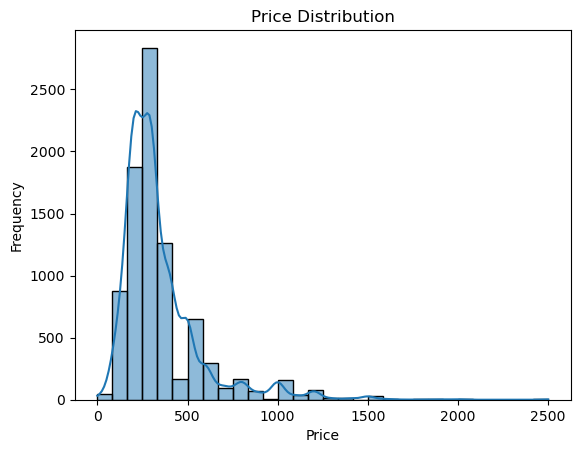

In [8]:
plt.figure()
plt.title("Price Distribution")
sns.histplot(df['Price'],bins=30,kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")


### Average Ratings Distribution


Text(0, 0.5, 'Frequency')

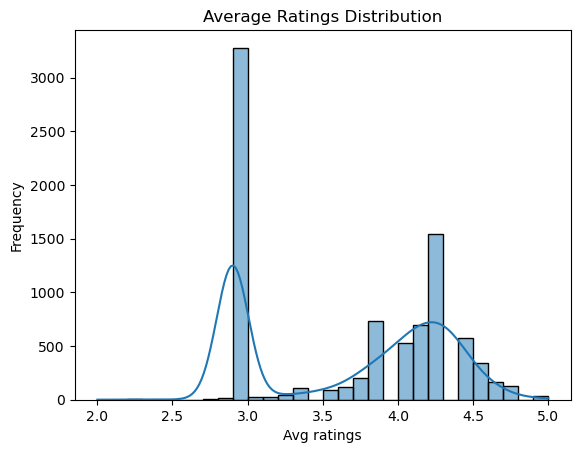

In [9]:
plt.figure()
sns.histplot(df['Avg ratings'],bins =30,kde=True)
plt.title("Average Ratings Distribution")
plt.ylabel("Frequency")

### Average Ratings by City

Text(0, 0.5, 'Average ratings')

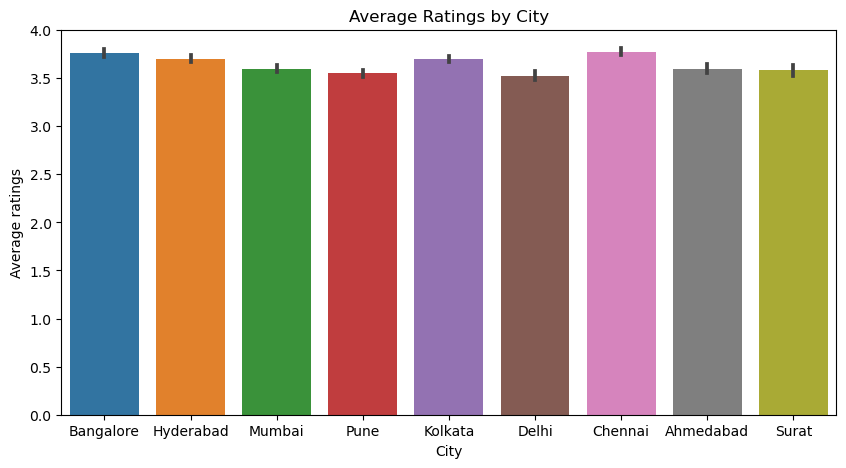

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='City',y="Avg ratings",data=df,estimator=np.mean)
plt.title("Average Ratings by City")
plt.xlabel('City')
plt.ylabel("Average ratings")

### Total Ratings vs. Average Ratings


Text(0.5, 1.0, 'Total Ratings vs. Average Ratings')

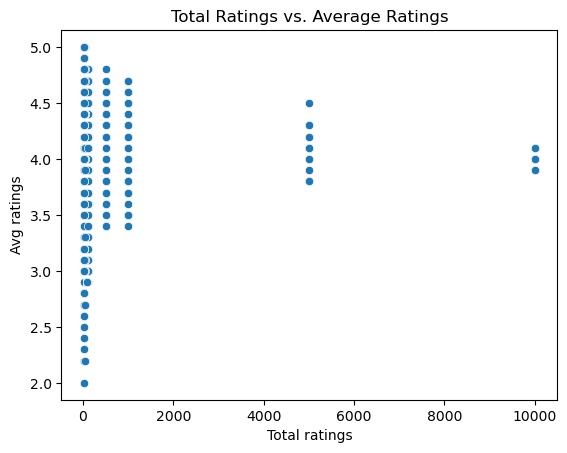

In [11]:
plt.figure()
sns.scatterplot(x='Total ratings',y='Avg ratings',data=df)
plt.title("Total Ratings vs. Average Ratings")

### Count of Restaurants by City

<Axes: title={'center': 'Number of Restaurants  by City'}, xlabel='City', ylabel='No:of Restaurants'>

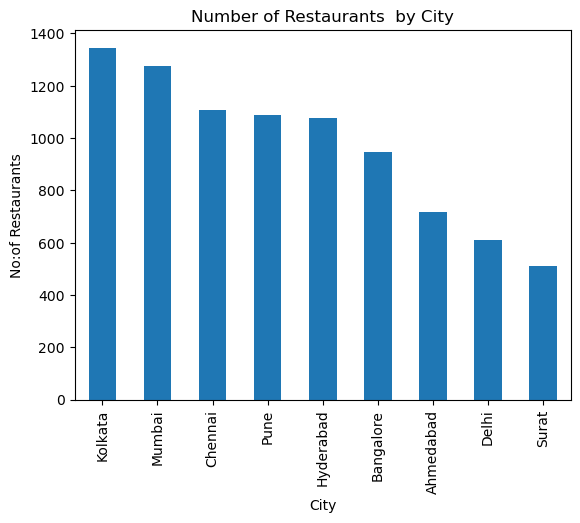

In [12]:
counts=df['City'].value_counts()
plt.figure()
plt.title("Number of Restaurants  by City")
plt.xlabel("City")
plt.ylabel("No:of Restaurants")
counts.plot(kind='bar')

### Top 10 highest rated restaurants

Text(0.5, 1.0, 'Top 10 highest rated restaurants')

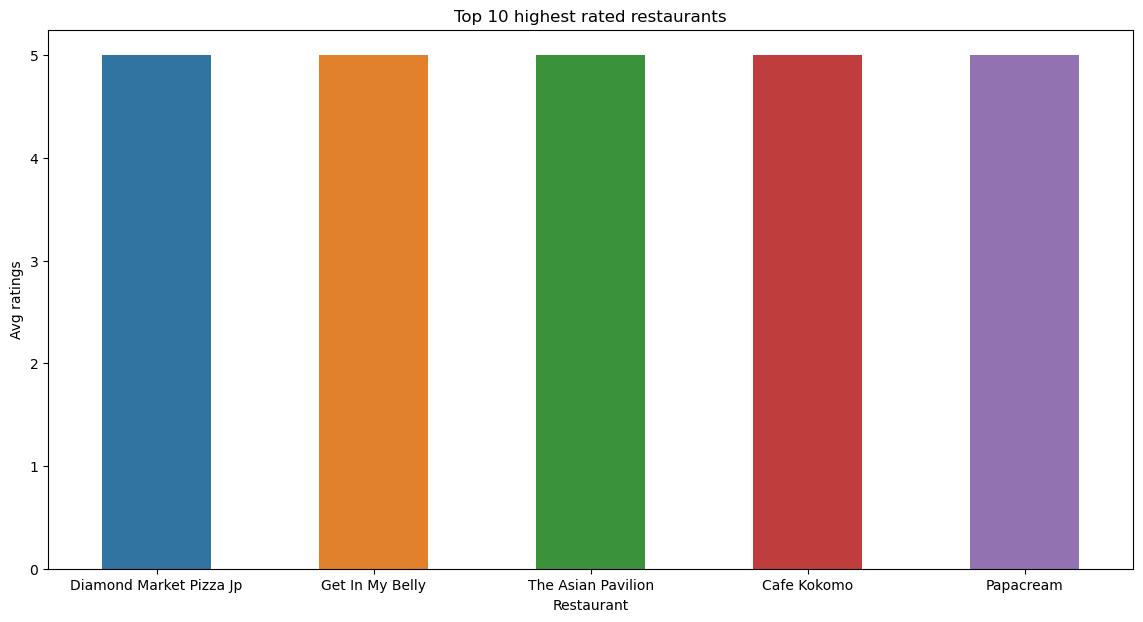

In [18]:
top=df.nlargest(5,"Avg ratings")
plt.figure(figsize=(14,7))
sns.barplot(x='Restaurant',y="Avg ratings",data=top,width=0.5)
plt.title("Top 10 highest rated restaurants")

###  Count of Restaurants by Food Type

Text(0, 0.5, '')

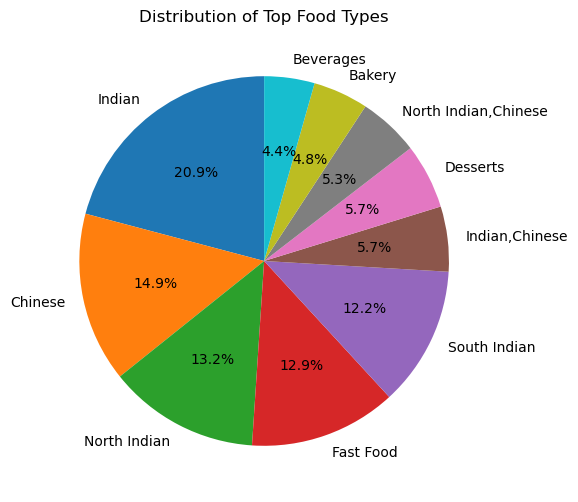

In [24]:
fd_count= df['Food type'].value_counts()
top10= fd_count.head(10)
plt.figure(figsize=(12,6))
top10.plot(kind='pie',autopct='%1.1f%%', startangle=90)
#autopct='%1.1f%%':formats the labels on the pie chart slices to display the % of each slice
#startangle=90:rotates the start of the pie chart by 90 degrees
plt.title("Distribution of Top Food Types")
plt.ylabel("")

### Distribution of Delivery Times

Text(0, 0.5, 'Frequency')

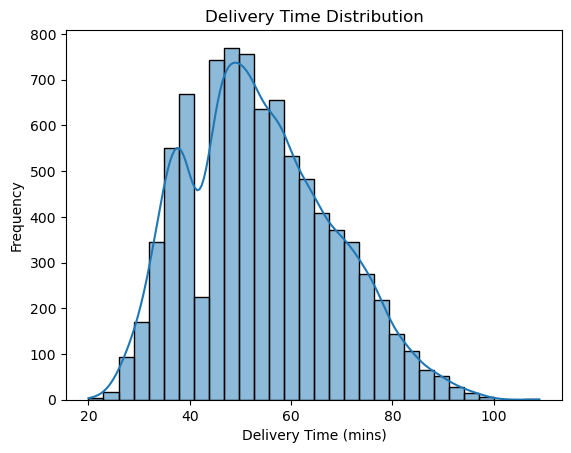

In [32]:
plt.figure()
sns.histplot(df['Delivery time'],kde=True,bins=30)
plt.title("Delivery Time Distribution")
plt.xlabel('Delivery Time (mins)')
plt.ylabel('Frequency')

### Average Delivery Time by City

Text(0, 0.5, 'Avg delivery time')

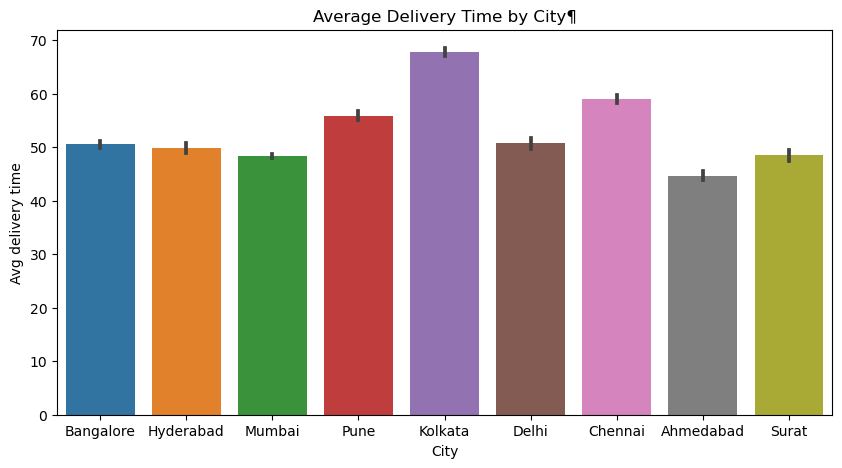

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='City',y='Delivery time',data=df,estimator=np.mean)
plt.title("Average Delivery Time by City¶")
plt.ylabel("Avg delivery time")

### Prices by City

Text(0, 0.5, 'Prices')

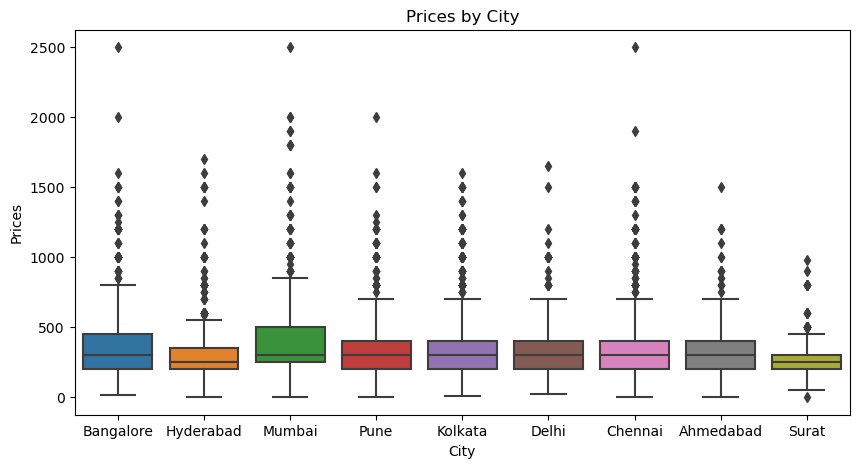

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x='City',y='Price',data=df)
plt.title("Prices by City")
plt.ylabel("Prices")

### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

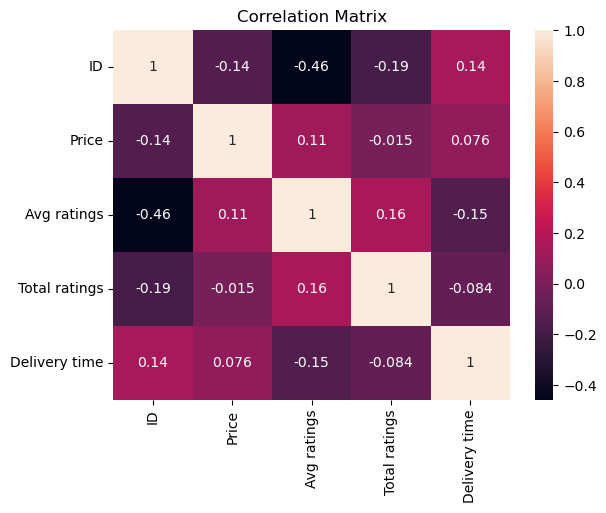

In [53]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Correlation Matrix")